In [148]:
import pandas as pd
from upsetplot import UpSet, from_contents
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3, venn3_circles

## file loading

In [156]:
MATAC_PATH = 'data/mm10_to_hg38_processed_11_12_22.csv'
MM10_BED_DF = pd.read_csv('data/mm10_location.bed', sep='\t', header=None)
MOUSE_DF = pd.read_csv(MATAC_PATH, index_col=0)
SER =   pd.read_excel('result/hATAC_combined_Dec_05_22.xlsx' , sheet_name=0 ,engine='openpyxl')
PSER = pd.read_excel('result/hATAC_combined_Dec_22.xlsx' , sheet_name=1 ,engine='openpyxl')
GRA =  pd.read_excel('result/hATAC_combined_Dec_05_22.xlsx' , sheet_name=2 ,engine='openpyxl')
PGRA =   pd.read_excel('result/hATAC_combined_Dec_05_22.xlsx' , sheet_name=3 ,engine='openpyxl')
hATAC = pd.read_csv('result/hATAC_Dec_05_22.csv', index_col=0)
GH_DF = pd.read_csv('data/GH_tissues_genes_summary.csv', index_col=0)
HATAC_MATAC = pd.read_excel('result/mATAC_hATAC_Dec_12_22.xlsx', index_col=0, engine='openpyxl')
HATAC_MATAC_GH = pd.read_excel('result/mATAC_hATAC_GH_Dec_12_22.xlsx', index_col=0, engine='openpyxl')
hATAC_GH = pd.read_excel('result/hATAC_GH_Dec_12_22.xlsx',  sheet_name=0, engine='openpyxl')
mATAC = pd.read_csv(MATAC_PATH, index_col=0)
GH = pd.read_excel('result/mATAC_GH_Dec_05_22.xlsx',  sheet_name=2, engine='openpyxl')



In [154]:
def mh_df():
    mdf = MOUSE_DF.copy()
    hdf = hATAC.copy()
    mdf.columns = MOUSE_DF.columns.str.replace('cm_','').str.replace('chr','chrom')
    mdf.chrom = mdf.chrom.str.replace('chr', '')
    hdf['label'] = f'hATAC (total {hATAC.shape[0]} peaks)'
    mdf['label'] = f'mATAC (total {mdf.shape[0]} peaks)'
    mATAC_hATAC_copy = HATAC_MATAC[['chrom','overlap_start','overlap_end', 'overlap_len']].copy()
    mATAC_hATAC_copy.columns = mATAC_hATAC_copy.columns.str.replace('overlap_','').str.replace('len','length')
    mATAC_hATAC_copy['label'] = f'overlap (total {mATAC_hATAC.shape[0]} peaks)'
    plot_df = pd.concat([mdf,hdf,mATAC_hATAC]).drop(columns=['start_idx','end_idx']).reset_index(drop=True)
    plot_df['length'] = plot_df.end - plot_df.start
    return plot_df


# plot_df = mh_df()
# plot_df.groupby('label').length.sum()


MATAC_PATH = 'data/mm10_to_hg38_processed_11_12_22.csv'
MM10_BED_DF = pd.read_csv('data/mm10_location.bed', sep='\t', header=None)
MOUSE_DF = pd.read_csv(MATAC_PATH, index_col=0)
SER =   pd.read_excel('result/hATAC_combined_Dec_05_22.xlsx' , sheet_name=0 ,engine='openpyxl')
PSER = pd.read_excel('result/hATAC_combined_Dec_05_22.xlsx' , sheet_name=1 ,engine='openpyxl')
GRA =  pd.read_excel('result/hATAC_combined_Dec_05_22.xlsx' , sheet_name=2 ,engine='openpyxl')
PGRA =   pd.read_excel('result/hATAC_combined_Dec_05_22.xlsx' , sheet_name=3 ,engine='openpyxl')
hATAC = pd.read_csv('result/hATAC_Dec_05_22.csv', index_col=0)
GH_DF = pd.read_csv('data/GH_tissues_genes_summary.csv', index_col=0)
HATAC_MATAC = pd.read_excel('result/mATAC_hATAC_Dec_12_22.xlsx', index_col=0, engine='openpyxl')
HATAC_MATAC_GH = pd.read_excel('result/mATAC_hATAC_GH_Dec_12_22.xlsx', index_col=0, engine='openpyxl')
hATAC_GH = pd.read_excel('result/hATAC_GH_Dec_12_22.xlsx',  sheet_name=0, engine='openpyxl')
mATAC = pd.read_csv(MATAC_PATH, index_col=0)
GH = pd.read_excel('result/mATAC_GH_Dec_05_22.xlsx',  sheet_name=2, engine='openpyxl')



def create_venn():
    hATAC_total         = (hATAC.end - hATAC.start).sum()
    mATAC_GH_total      = mATAC_GH.overlap_len.sum()
    mATAC_total         = mATAC.length.sum()
    GH_total            = GH.length.sum()
    hATAC_GH_total      = hATAC_GH.overlap_len.sum()
    hATAC_mATAC_total   = hATAC_mATAC.overlap_len.sum()
    hATAC_mATAC_GH_total= hATAC_mATAC_GH.overlap_len.sum()


    hATAC_only =  hATAC_total - hATAC_mATAC_total - hATAC_GH_total + hATAC_mATAC_GH_total
    hATAC_GH_only  = hATAC_GH_total - hATAC_mATAC_GH_total
    mATAC_GH_only    = mATAC_GH_total - hATAC_mATAC_GH_total

    hATAC_mATAC_only = hATAC_mATAC_total - hATAC_mATAC_GH_total
    mATAC_only       =  mATAC_total - mATAC_GH_only - hATAC_mATAC_only + hATAC_mATAC_GH_total
    GH_only          = GH_total - hATAC_GH_only -  mATAC_GH_only + hATAC_mATAC_GH_total


    hATAC_mATAC_GH_totaly= round(hATAC_mATAC_GH_total / 1000000,1)
    hATAC_mATAC_onlyy = round(hATAC_mATAC_only / 1000000,1)
    hATAC_GH_onlyy    = round(hATAC_GH_only    / 1000000,1)
    mATAC_GH_onlyy    = round(mATAC_GH_only      / 1000000,1)
    mATAC_onlyy       = round(mATAC_only       / 1000000,1)
    hATAC_onlyy       = round(hATAC_only       / 1000000,1)
    GH_onlyy          = round(GH_only          / 1000000,1)

    # Create figure

    fig = plt.figure() 

    # Figure size

    fig.set_size_inches(10, 16)
    font1 = {'size':14}
    plt.rc('font', **font1)
    venn = venn3(subsets = (GH_onlyy, 
                            hATAC_onlyy ,
                            hATAC_GH_onlyy, 
                            mATAC_onlyy,
                            mATAC_GH_onlyy, 
                            hATAC_mATAC_onlyy, 
                            hATAC_mATAC_GH_totaly),
                 set_labels = 
                 (f'GH\n({round(GH_total  / 1000000,1) }Mbp)',
                  f'hATAC\n ({round(hATAC_total  / 1000000,1) }Mbp)', f'mATAC\n({round(mATAC_total  / 1000000,1) }Mbp)'))

    return venn

## Table of Contents
* [Introduction](#introduction)
* [Analysis summary](#summary)
* [Data pre-processing](#data_processing)
    * [Mouse ATAC-seq](#mATAC_prepro)
    * [Human ATAC-seq](#hATAC_prepro)
    * [GeneHancer Data](#GH_data)
* [Mouse ATAC vs Human ATAC](#hatac_matac)
* [Integrating GeneHancer data](#GH_integration)
* [Vizualization](#data_viz)

# ATAC - GeneHancer analysis summary report
## Ido Blass
The goal of the summary is to introduce the methods and result of the analysis pipeline <br>



# Introduction  <a class="anchor" id="introduction"></a>
It is known which genes are involved in the process of sex detrmination. However, many cases of Disorders of Sexual Differentiation (DSD) still have an unidentified etiology. <br>
Gene enhancers, which regulate the expression of genes, are an additional factor in biological processes. <br>
It can be useful to identify enhancers who participate in the sex determination process in order to address the source issue in many DSD cases. <br>
Finding questionable areas of the human genome that may include enhancers involved in the process of sex detrmination is the aim of this investigation.
# Analysis summary  <a class="anchor" id="summary"></a>
There are two primary stages to the analysis: <br>
-  At the time of the cell's sex determination, an ATAC sequence expirement on human and mouse samples was performed. <br> Using the Python application "CrossMap" (CM), the mouse expirement results were transformed from mm10 to hg38. The program converts the genomic coordinations using the UCSC chain file and the LiftOver algorithm.<br> Four distinct cell types were used for the human ATAC-seq experiment:
    - Sertoli (SER)
    - Granulosa (GRA)
    - XX early supporting cells (PGRA)
    - XY early supporting cells (PSER) <br></div> <br>
The results were consolidated into a single file and compared to the converted mouse ATAC result's coordinates.
-  Each coordinate was crossed with information from GeneHancer in order to indicate areas with a high likelihood of containing enhancers.<br> If the coordinates were located in the database, a list of genes associated with the location and further details were retrieved.

# Data pre-processing   <a class="anchor" id="data_processing"></a>
The raw data of the analysis includes the following sources - <br>
- Mouse ATAC-seq
- Human ATAC-seq 
- GeneHancer <br>

each source was proccesed initially in order to preform the comperasion. 

### Mouse ATAC-seq  <a class="anchor" id="mATAC_prepro"></a>

Data source: Gonen lab

The raw mm10 BED file was converted using <a href=https://crossmap.sourceforge.net/> CrossMap</a> (version 0.6.5) (CM) with mm10 to hg38 chain file from the <a href=https://hgdownload.cse.ucsc.edu/goldenpath/hg19/liftOver/> UCSC site</a>. <br> 
By applying CM to the mm10 file's 268,974 coordinates, 1,146,798 coordinated regions in hg38 were produced, some of which overlapped. <br>
189,622  coordinates were produced by merging sections with less than 100 bp in between them. <br>
A unique ID was given to each coordinate <br>
UCSC OverLift implementation was one of several conversion techniques used; the end results were largely the same. <br>
Data sample sample-<br>

Raw data:

|    | 0    |       1 |       2 | 3                    |
|---:|:-----|--------:|--------:|:---------------------|
|  0 | chr1 | 3012714 | 3012809 | chr1_3012714_3012809 |
|  1 | chr1 | 3046657 | 3046847 | chr1_3046657_3046847 |
|  2 | chr1 | 3062952 | 3063201 | chr1_3062952_3063201 |
|  3 | chr1 | 3083766 | 3083876 | chr1_3083766_3083876 |
|  4 | chr1 | 3094792 | 3095286 | chr1_3094792_3095286 |

After converting-

|    | cm_chr   |   cm_start |   cm_end | start_idx                | end_idx                  | cm_id   |
|---:|:---------|-----------:|---------:|:-------------------------|:-------------------------|:--------|
|  0 | chr1     |      29209 |    29547 | chr17_66111409_66111961  | chr17_66111409_66111961  | NCM0     |
|  1 | chr1     |     933525 |   933665 | chr4_156255559_156255678 | chr4_156255559_156255678 | NCM1     |
|  2 | chr1     |     935718 |   935946 | chr4_156254405_156254629 | chr4_156254405_156254629 | NCM2     |
|  3 | chr1     |     944387 |   944748 | chr4_156247064_156247340 | chr4_156247064_156247340 | NCM3     |
|  4 | chr1     |     958995 |   959429 | chr4_156235831_156236240 | chr4_156235831_156236240 | NCM4     |

columns explanation: <br>
-  cm_chr: the chromosome of the coordinate
-  cm_start & cm_end: the start and end point of the coordinate
-  start_idx & end_idx: the mouse BED file's initial index for the start point and end point (col 3 in the original file). <br> The end differs from the start if the coordinate is the outcome of merging.
-  cm_id: unique id for the coordinate


### Human ATAC-seq  <a class="anchor" id="hATAC_prepro"></a>

Data source:  Roser paper 

The raw data contained 4 files, each file contains ATAC sequence of different cell type: <br>
- Sertoli (SER)
- Granulosa (GRA)
- XX early supporting cells (PGRA)
- XY early supporting cells (PSER) <br></div> <br>
Each raw in the raw data was given an id, which indicates the coordinate source. <br>
sample of PGRA raw data: <br>


|    |   chrom |   start |    end |   peak_counts | id     |
|---:|--------:|--------:|-------:|--------------:|:-------|
|  0 |       1 |  633869 | 634519 |           343 | PGRA_0 |
|  1 |       1 |  778146 | 779332 |           820 | PGRA_1 |
|  2 |       1 |  826595 | 827807 |           414 | PGRA_2 |
|  3 |       1 |  869452 | 870256 |           219 | PGRA_3 |
|  4 |       1 |  903756 | 905651 |           434 | PGRA_4 |



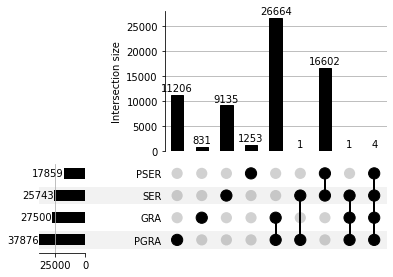

In [38]:
source_dict = {}
for k,v in {'SER':SER,'PSER':PSER,'GRA':GRA,'PGRA':PGRA}.items():
        source_dict[k] = (v.chrom.astype(str) + v.end.astype(str) + v.start.astype(str)).tolist()
        
plt = UpSet(from_contents(source_dict), subset_size='count', min_subset_size=0 ,show_counts=True).plot()        

The following plot shows the shared coordinate between the four files.Shared coordinates have the exact same chromosome, start & end point. <br>
Each file's total number of coordinates is listed on the plot's left side. <br>

The removal of duplicate coordinates and the merging of overlapping coordinates are both done during the file merging process. <br>
New ID was assigned to shared coordinates, containing both sources. <br>
Overlaped coordinate were merged such that a new coordinate was created using the minimal start point and maximal end point. the new ID of the coordinate includes the name of the source which the coordinate were made of.<br>

The processed file contained 42,026 coordinates

sample of the processed data (other file contains the coordinates): 

|    |   chrom |   start |    end | id                  |
|---:|--------:|--------:|-------:|:--------------------|
|  0 |       1 |  629800 | 630038 | SER_0               |
|  1 |       1 |  633869 | 634124 | PGRA.SER.GRA_1      |
|  2 |       1 |  778146 | 779303 | PGRA.SER.GRA.PSER_2 |
|  3 |       1 |  826595 | 827807 | PGRA.SER.GRA.PSER_3 |
|  4 |       1 |  869370 | 870256 | PGRA.SER.GRA_4      |

### GeneHancer Data <a class="anchor" id="GH_data"></a>
The <a href=https://www.weizmann.ac.il/molgen/genehancer-genome-wide-integration-enhancers-and-target-genes-genecards > GenHancer </a> DB contains information about promotors and enhancers. <br>
It combines data from other sources such as FANTOM5, dbSUPER & ENCODE. <br>
The information includes specifics on the location of the enhancer, the genes that it regulates, the database source, and the type of cell that it was discovered in. <br>
This information was combined with a list of 105 genes which are associated to the process of determining sex. together with a list of several cell types found in the reproductive system. <br>

Sample of the processed data:<br>

| GHid        |   count_gene_in_list | gene_score_in_list   |   count_gene_not_list |   total_count_gene |   source_count | source                 | found_in_gonad_tissue   | gonad_tissues      |   tissue_count | tissue                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
|:------------|---------------------:|:---------------------|----------------------:|-------------------:|---------------:|:-----------------------|:------------------------|:-------------------|---------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| GH01J022015 |                    1 | ['WNT4 : 10.3459']   |                     6 |                  7 |              2 | Ensembl|dbSUPER        | False                   | nan                |              4 | HepG2|iPS DF 19.11|M1 macrophage (VB)|Pancreas                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| GH01J022016 |                    1 | ['WNT4 : 10.3459']   |                     6 |                  7 |              1 | Ensembl                | False                   | nan                |              7 | K562|M0 macrophage (CB)|M0 macrophage (VB)|M1 macrophage (CB)|M1 macrophage (VB)|M2 macrophage (CB)|Neutrophils (VB)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| GH01J022018 |                    1 | ['WNT4 : 10.34641']  |                     8 |                  9 |              3 | FANTOM5|dbSUPER|ENCODE | False                   | nan                |             41 | blood vessel endothelial cell|dendritic cell|mesenchymal cell|monocyte|natural killer cell|T cell|CD14+ monocytes|CD19 primary cells|CD20+ B cells|CD3 primary cells|CD34 primary cells|CD4 memory primary cells|CD4 naive primary cells|CD4+ CD25- CD45RA+ naive primary cells|CD4+ CD25- CD45RO+ memory primary cells|CD4+ CD25- IL17+ PMA Th17 primary cells|CD4+ CD25- IL17- PMA Th primary cells|CD4+ CD25int CD127+ Tmem primary cells|CD8 memory primary cells|CD8 naive primary cells|Spleen|GM12878|K562|Panc1|mesenchymal stem cell|myotube|astrocyte|B cell|CD14-positive monocyte|common myeloid progenitor, CD34-positive|endothelial cell of umbilical vein|fibroblast of dermis|fibroblast of lung|foreskin fibroblast|foreskin melanocyte|keratinocyte|mammary epithelial cell|skeletal muscle myoblast|T-cell|pancreas|thymus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| GH01J022022 |                    1 | ['WNT4 : 10.34641']  |                     7 |                  8 |              1 | ENCODE                 | False                   | nan                |              7 | GM12878|HCT116|HepG2|Panc1|iPS DF 19.11|natural killer cell|T-cell                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| GH01J022023 |                    1 | ['WNT4 : 10.34897']  |                    12 |                 13 |              3 | Ensembl|dbSUPER|ENCODE | True                    | Ovary,female gonad |            139 | A549|A673|Adrenal gland (fetal)|Astrocytes|B cells|GM23338 bipolar neurons|B cells (PB)|RUES2 cardiac muscle cells|CD14+ monocytes|CD14+ monocytes (PB)|CD4+ ab T cells|CD4+ ab T cells (PB)|CD4+ ab memory T cells (PB)|CD4+CD25+ ab regulatory T cells (PB)|CD8+ ab T cells (CB)|CD8+ ab T cells (PB)|Common myeloid progenitor CD34+|Fibroblast of dermis|Effector memory CD8+ ab T cells (VB)|hESC endodermal cells|EPC (VB)|Esophagus|Fibroblast of foreskin|Foreskin keratinocytes|Foreskin melanocytes|GM12878|H1-hESC|H9|HCT116|Heart (fetal)|HeLa-S3|HepG2|Skeletal muscle myoblasts|HUES48|HUES6|HUES64|Endothelial cells of umbilical vein|Endothelial cells of umbilical vein (CB)|iPS-15b|iPS-20b|iPS DF 19.11|iPS DF 6.9|Keratinocytes|Kidney (fetal)|Large intestine (fetal)|Left ventricle|Muscle leg (fetal)|Lung (fetal)|Lung|M1 macrophage (CB)|M1 macrophage (VB)|M2 macrophage (CB)|M2 macrophage (VB)|Mammary epithelial cells|Mammary myoepithelial cells|MCF-7|MM.1S|CD14+CD16- monocytes (VB)|Mononuclear cells (PB)|H1 mesenchymal stem cells|Mesenchymal stem cells (BM|VB)|HSMM myotube|B cells (VB)|H9 neuron cells|Cortex neurosphere|Ganglion eminence neurosphere|Neutrophils (CB)|Neutrophilic myelocytes (BM)|NHLF|Natural killer cells (PB)|H9 neural progenitor cells|H1 neural progenitor cells|Osteoblasts|Ovary|Pancreas|PC-3|PC-9|Psoas muscle|Right atrium|Right ventricle|SK-N-SH|Small intestine (fetal)|Spleen|Stomach (fetal)|Stomach|T helper 17 cells|Thymus|Thymus (fetal)|H1 trophoblast|Muscle trunk (fetal)|T cells (PB)|UCSF-4|CD19 primary cells|CD20+ B cells|CD3 primary cells|CD34 primary cells|CD4 memory primary cells|CD4 naive primary cells|CD4+ CD25- CD45RA+ naive primary cells|CD4+ CD25- CD45RO+ memory primary cells|CD4+ CD25- IL17+ PMA Th17 primary cells|CD4+ CD25- IL17- PMA Th primary cells|CD4+ CD25int CD127+ Tmem primary cells|CD8 memory primary cells|CD8 naive primary cells|K562|Panc1|mesenchymal stem cell|mesendoderm|myotube|astrocyte|B cell|CD14-positive monocyte|common myeloid progenitor, CD34-positive|endothelial cell of umbilical vein|fibroblast of dermis|fibroblast of lung|foreskin fibroblast|foreskin melanocyte|IMR-90|keratinocyte|mammary epithelial cell|natural killer cell|skeletal muscle myoblast|T-cell|trophoblast cell|neural stem progenitor cell|adrenal gland|female gonad|large intestine|muscle of leg|muscle of trunk|pancreas|placenta|psoas muscle|small intestine|stomach|thymus |                                          |


## Mouse ATAC vs Human ATAC <a class="anchor" id="hatac_matac"></a>
A script for finding overlaps between the processed human ATAC  and the mouse ATAC result was done.<br>
The output file of the script is an excel XLSX file with three tabs - two tabs with the input, third with the output <br>
total 39,956 overlaps were found <br>  
an unique ID was given to each overlap.
sample of the output tab - 


|    | new_id        |   chrom | hATAC_id             |   hATAC_start |   hATAC_end |   hATAC_n_base | mATAC_id   |   mATAC_start |   mATAC_end |   mATAC_n_base |   overlap_len |   overlap_start |   overlap_end |
|---:|:--------------|--------:|:---------------------|--------------:|------------:|---------------:|:-----------|--------------:|------------:|---------------:|--------------:|----------------:|--------------:|
|  0 | mATAC_hATAC_0 |       1 | PGRA.SER.GRA.PSER_12 |        958473 |      959544 |           1071 | CM4        |        958995 |      959429 |            434 |           434 |          958995 |        959429 |
|  1 | mATAC_hATAC_1 |       1 | PGRA.SER_13          |        959935 |      961478 |           1543 | CM5        |        960448 |      960735 |            287 |           287 |          960448 |        960735 |
|  2 | mATAC_hATAC_2 |       1 | PGRA.SER.GRA.PSER_14 |        966167 |      967355 |           1188 | CM6        |        966745 |      966844 |             99 |            99 |          966745 |        966844 |
|  3 | mATAC_hATAC_3 |       1 | PGRA.SER.GRA.PSER_14 |        966167 |      967355 |           1188 | CM7        |        967009 |      967093 |             84 |            84 |          967009 |        967093 |
|  4 | mATAC_hATAC_4 |       1 | PGRA.SER.PSER.GRA_20 |       1019132 |     1021475 |           2343 | CM11       |       1019251 |     1020178 |            927 |           927 |         1019251 |       1020178 |

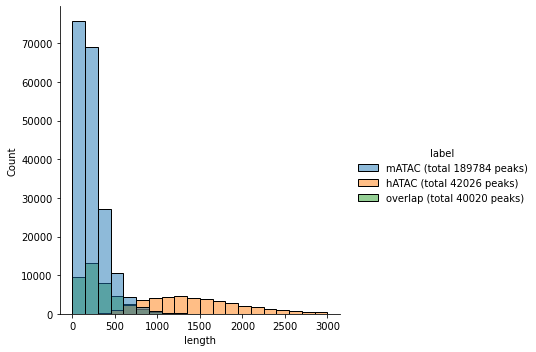

In [134]:
ax = sns.displot(data=plot_df, x="length", hue="label", fill='label', kind="hist",bins=20, binrange=(0,3000))

The polt below is histogram of the peaks length of each source and the overlap <br>

## Integrating GeneHancer data <a class="anchor" id="GH_integration"></a>
In this part of the analysis, each source + overlap analysis result were crossed with the GeneHance DB. <br>
sample of the GH-hATAC-mATAC crossing result (the col 'gene_score_not_list' was ommited from this sample due length issue) :

|    | new_id            |   chrom | GH_id       |   GH_start |   GH_end |   GH_n_base | mATAC.hATAC_id   |   mATAC.hATAC_start |   mATAC.hATAC_end |   mATAC.hATAC_n_base |   overlap_len |   overlap_start |   overlap_end |   count_gene_in_list |   gene_score_in_list | found_in_gonad_tissue   | gonad_tissues   |   count_gene_not_list |   total_count_gene |   source_count | source                 |   tissue_count | tissue                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
|---:|:------------------|--------:|:------------|-----------:|---------:|------------:|:-----------------|--------------------:|------------------:|---------------------:|--------------:|----------------:|--------------:|---------------------:|---------------------:|:------------------------|:----------------|----------------------:|-------------------:|---------------:|:-----------------------|---------------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | mATAC.hATAC_GH_49 |       1 | GH01J000957 |     957600 |   962001 |        4401 | mATAC_hATAC_0    |              958995 |            959429 |                  434 |           434 |          958995 |        959429 |                    0 |                  nan | False                   | nan             |                    18 |                 18 |              1 | ENCODE                 |             23 | GM12878|HCT116|HeLa-S3|HepG2|K562|Panc1|B cell|CD14-positive monocyte|common myeloid progenitor, CD34-positive|foreskin fibroblast|foreskin melanocyte|IMR-90|keratinocyte|mammary epithelial cell|natural killer cell|T-cell|H1-hESC|neural stem progenitor cell|pancreas|psoas muscle|small intestine|stomach|thymus                                                                                                                                                                                                                                                                                                                                                      |
|  1 | mATAC.hATAC_GH_50 |       1 | GH01J000957 |     957600 |   962001 |        4401 | mATAC_hATAC_1    |              960448 |            960735 |                  287 |           287 |          960448 |        960735 |                    0 |                  nan | False                   | nan             |                    18 |                 18 |              1 | ENCODE                 |             23 | GM12878|HCT116|HeLa-S3|HepG2|K562|Panc1|B cell|CD14-positive monocyte|common myeloid progenitor, CD34-positive|foreskin fibroblast|foreskin melanocyte|IMR-90|keratinocyte|mammary epithelial cell|natural killer cell|T-cell|H1-hESC|neural stem progenitor cell|pancreas|psoas muscle|small intestine|stomach|thymus                                                                                                                                                                                                                                                                                                                                                      |
|  2 | mATAC.hATAC_GH_51 |       1 | GH01J000965 |     965688 |   967601 |        1913 | mATAC_hATAC_2    |              966745 |            966844 |                   99 |            99 |          966745 |        966844 |                    0 |                  nan | False                   | nan             |                     7 |                  7 |              1 | ENCODE                 |             16 | GM12878|HCT116|HeLa-S3|K562|Panc1|CD14-positive monocyte|foreskin fibroblast|keratinocyte|mammary epithelial cell|natural killer cell|T-cell|pancreas|placenta|psoas muscle|small intestine|stomach                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|  3 | mATAC.hATAC_GH_52 |       1 | GH01J000965 |     965688 |   967601 |        1913 | mATAC_hATAC_3    |              967009 |            967093 |                   84 |            84 |          967009 |        967093 |                    0 |                  nan | False                   | nan             |                     7 |                  7 |              1 | ENCODE                 |             16 | GM12878|HCT116|HeLa-S3|K562|Panc1|CD14-positive monocyte|foreskin fibroblast|keratinocyte|mammary epithelial cell|natural killer cell|T-cell|pancreas|placenta|psoas muscle|small intestine|stomach                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|  4 | mATAC.hATAC_GH_53 |       1 | GH01J001019 |    1019000 |  1022441 |        3441 | mATAC_hATAC_4    |             1019251 |           1020178 |                  927 |           927 |         1019251 |       1020178 |                    0 |                  nan | True                    | female gonad    |                    17 |                 17 |              3 | FANTOM5|dbSUPER|ENCODE |             43 | acinar cell|astrocyte|corneal epithelial cell|dendritic cell|endothelial cell of hepatic sinusoid|endothelial cell of lymphatic vessel|gingival epithelial cell|intestinal epithelial cell|keratinocyte|kidney epithelial cell|lens epithelial cell|myoblast|preadipocyte|respiratory epithelial cell|skin fibroblast|smooth muscle cell of prostate|H9|V9M|GM12878|HCT116|HeLa-S3|HepG2|K562|Panc1|mesenchymal stem cell|mesendoderm|iPS DF 19.11|B cell|foreskin fibroblast|IMR-90|mammary epithelial cell|natural killer cell|T-cell|H1-hESC|neural stem progenitor cell|female gonad|large intestine|muscle of leg|pancreas|psoas muscle|small intestine|stomach|thymus |



The following venn diagram shows the amount of Mbp shared between the sources

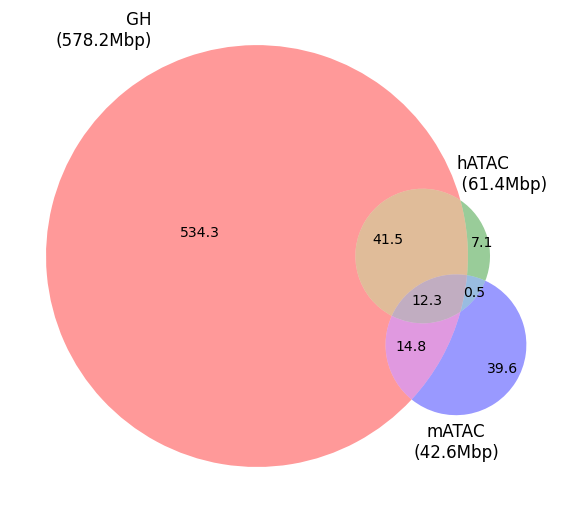

In [157]:
create_venn()


The raw data, full result can be found in Gonen's lab dropbox on the path \Nitzan Gonen\Nitzan Gonen lab\Joint projects\WGS on DSD. <br>
Raw data casn be found unbder the folder "source"
## Vizualization <a class="anchor" id="data_viz"></a>
3 ways have been done in order to view the data in convineint way-

  1. UCSC browser - BED files which can be uploaded to the UCSC browser are available on the drop box project foldre on \WGS on DSD\UCSC BED files
  2. IGV browser - BED file with more information can be found on WGS on DSD\IGV_BED_files
  3. A tool I built using R shiny package can be found <a href=https://toozig.shinyapps.io/Variants_search/> here </a>